<a href="https://colab.research.google.com/github/nickwan/nwds-stream-notebooks/blob/main/talk_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#font for chat

In [ ]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '24px'
      break
    }
  }
  '''))
get_ipython().events.register('pre_run_cell', increase_font)

# talk

In [ ]:
!pip install pybaseball

<IPython.core.display.Javascript object>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 9.4 MB/s eta 0:00:00


In [ ]:
def draw_sz(sz_top=3.5, sz_bot=1.5, ls='k-'):
  """
  draw strike zone
  draw the strike zone on a plot using mpl
  inputs:
    sz_top: top of strike zone (ft)
    sz_bot: bottom of strike zone (ft)
    ls: linestyle (use `plt.plot()` linestyle conventions)
  output:
    strike zone plot
  """
  plt.plot([-0.708, 0.708], [sz_bot,sz_bot], ls)
  plt.plot([-0.708, -0.708], [sz_bot,sz_top], ls)
  plt.plot([0.708, 0.708], [sz_bot,sz_top], ls)
  plt.plot([-0.708, 0.708], [sz_top,sz_top], ls)

def draw_home_plate(catcher_perspective=True, ls='k-'):
  """
  draw home plate from either the catcher perspective or pitcher perspective
  inputs:
    catcher_perspective: orient home plate in the catcher POV. if False, orients
      home plate in the pitcher POV.
    ls: linestyle (use `plt.plot()` linestyle conventions)
  output:
    home plate plot
  """
  if catcher_perspective:
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,-0.3], ls)
    plt.plot([0.708, 0.708], [0,-0.3], ls)
    plt.plot([-0.708, 0], [-0.3, -0.6], ls)
    plt.plot([0.708, 0], [-0.3, -0.6], ls)
  else:
    plt.plot([-0.708, 0.708], [0,0], ls)
    plt.plot([-0.708, -0.708], [0,0.1], ls)
    plt.plot([0.708, 0.708], [0,0.1], ls)
    plt.plot([-0.708, 0], [0.1, 0.3], ls)
    plt.plot([0.708, 0], [0.1, 0.3], ls)

def polar_to_cartesian(radius, angle_degrees):
  """Converts polar coordinates (radius, angle) to Cartesian coordinates (x, y).

  Args:
    radius: The distance from the origin.
    angle_degrees: The angle in degrees measured counterclockwise from the positive x-axis.

  Returns:
    A tuple (x, y) representing the Cartesian coordinates.
  """
  angle_radians = np.radians(angle_degrees)
  x = radius * np.cos(angle_radians)
  y = radius * np.sin(angle_radians)
  return x, y

<IPython.core.display.Javascript object>

In [ ]:
import os
import pandas as pd
import numpy as np
import pybaseball as bb
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

<IPython.core.display.Javascript object>

In [ ]:
df = bb.statcast_pitcher(start_dt='2024-03-01',
                         end_dt='2024-11-01',
                         player_id=664747)
df.shape

<IPython.core.display.Javascript object>

Gathering Player Data


(1045, 113)

In [ ]:
df.columns.values

<IPython.core.display.Javascript object>

array(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year',
       'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire', 'sv_id', 'vx0',
       'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension',
       'game_pk', 'fielder_2', 'fielder_3', 'fielder_4', 'fielder_5',
       'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9',
       'release_pos_y', 'estimated_ba_using_speedangle',
  

In [ ]:
df.head()

<IPython.core.display.Javascript object>

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
0,FF,2024-09-28,92.0,-2.07,4.67,"Díaz, Alexis",664023,664747,field_out,hit_into_play,...,1,4,6.0,1.0,NaN,1.0,1.64,0.97,-0.97,9.8
1,FF,2024-09-28,92.8,-2.25,4.69,"Díaz, Alexis",665804,664747,field_out,hit_into_play,...,1,3,6.0,1.0,NaN,NaN,1.65,0.97,0.97,9.0
2,SL,2024-09-28,87.2,-2.15,4.87,"Díaz, Alexis",665804,664747,NaN,foul,...,1,3,6.0,1.0,NaN,NaN,2.50,-0.02,-0.02,15.6
3,SL,2024-09-28,86.7,-2.25,4.88,"Díaz, Alexis",665804,664747,NaN,called_strike,...,1,3,6.0,1.0,NaN,NaN,2.47,0.15,0.15,13.0
4,FF,2024-09-28,90.6,-2.11,4.72,"Díaz, Alexis",665804,664747,NaN,ball,...,1,3,6.0,1.0,NaN,NaN,1.70,0.87,0.87,10.0


In [ ]:
cols = [
    'pfx_x', 'pfx_z','arm_angle','pitch_name', 'release_speed'
]
df_plt = df.loc[:, cols].copy()
df_plt['pfx_z_adj'] = df_plt['pfx_z'].mul(12)
df_plt['pfx_x_adj'] = df_plt['pfx_x'].mul(-12)
x,y = polar_to_cartesian(18,df_plt['arm_angle'])
df_plt['aa_x'] = x
df_plt['aa_z'] = y
aa_x = df_plt['aa_x'].mean()
aa_z = df_plt['aa_z'].mean()
df_plt.head()

<IPython.core.display.Javascript object>

,pfx_x,pfx_z,arm_angle,pitch_name,release_speed,pfx_z_adj,pfx_x_adj,aa_x,aa_z
0,-0.97,1.04,9.8,4-Seam Fastball,92.0,12.48,11.64,17.737342,3.063771
1,-0.97,0.98,9.0,4-Seam Fastball,92.8,11.76,11.64,17.778390,2.815820
2,0.02,0.47,15.6,Slider,87.2,5.64,-0.24,17.336926,4.840557
3,-0.15,0.56,13.0,Slider,86.7,6.72,1.80,17.538661,4.049119
4,-0.87,1.07,10.0,4-Seam Fastball,90.6,12.84,10.44,17.726540,3.125667


<IPython.core.display.Javascript object>

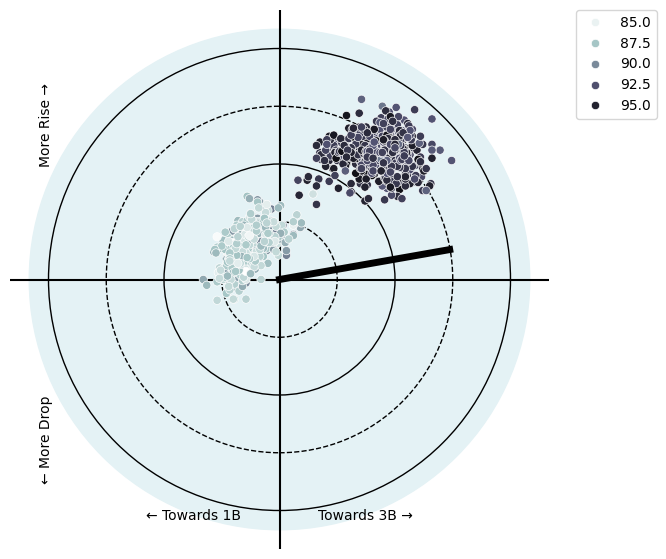

In [ ]:
fig = plt.figure(figsize=(7,7))
fig = sns.scatterplot(data=df_plt, x='pfx_x_adj',
                      y='pfx_z_adj', hue='release_speed',
                      zorder=3, palette='bone_r')
plt.plot([0,aa_x], [0, aa_z], 'k-', lw=5)

p1 = Circle((0,0), 6, ls='--', zorder=-1,
            lw=1, color='k', fill=None)

p2 = Circle((0,0), 12, ls='-', zorder=-1,
            lw=1, color='k', fill=None)

p3 = Circle((0,0), 18, ls='--', zorder=-1,
            lw=1, color='k', fill=None)

p4 = Circle((0,0), 24, ls='-', zorder=-1,
            lw=1, color='k', fill=None)

p5 = Circle((0,0), 26, ls='-', zorder=-2,
            lw=1, color=(228/255,242/255,245/255))

ps = [p1,p2,p3,p4, p5]
for p in ps:
  fig.add_patch(p)

plt.axhline(0, ls='-', c='k')
plt.axvline(0, ls='-', c='k')

plt.text(-25, 12, 'More Rise →', rotation=90)
plt.text(-25, -12, '← More Drop', rotation=90, va='top')
plt.text(4, -25, 'Towards 3B →')
plt.text(-4, -25, '← Towards 1B', ha='right')

plt.xlim(-28,28)
plt.ylim(-28,28)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
sns.despine(left=True, bottom=True)
fig.xaxis.set_visible(False)
fig.yaxis.set_visible(False)
fig.set_aspect('equal')
plt.show()

# USE SCI HUB DAILY